# Data Cleaning and Exploration Using Python

### Data Source Used:-
Dataset used in this case is from Kaggle FIFA 21 messy, raw dataset for cleaning/ exploring. 

### Biasness or credibility:-
No biasness found in this data.

### Licensing, Privacy, Security, and Accessibility of Data

* Licensing-CC0:
Public Domain

* Accessibility of Data-
Dataset used in this case study is a Public Data source so it has free acess, usage, and sharing of data.

# Data Preparation

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot  as plt
import seaborn as sns
import re

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/fifa-21-messy-raw-dataset-for-cleaning-exploring/fifa21 raw data v2.csv
/kaggle/input/fifa-21-messy-raw-dataset-for-cleaning-exploring/fifa21_raw_data.csv


In [3]:
Player_data= pd.read_csv('/kaggle/input/fifa-21-messy-raw-dataset-for-cleaning-exploring/fifa21_raw_data.csv')
Player_data.head()

/tmp/ipykernel_32/1605368668.py:1: DtypeWarning: Columns (76) have mixed types. Specify dtype option on import or set low_memory=False.
  Player_data= pd.read_csv('/kaggle/input/fifa-21-messy-raw-dataset-for-cleaning-exploring/fifa21_raw_data.csv')


,photoUrl,LongName,playerUrl,Nationality,Positions,Name,Age,↓OVA,POT,Team & Contract,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,https://cdn.sofifa.com/players/158/023/21_60.png,Lionel Messi,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,RW ST CF,L. Messi,33,93,93,\n\n\n\nFC Barcelona\n2004 ~ 2021\n\n,...,Medium,Low,5 ★,85,92,91,95,38,65,\n372
1,https://cdn.sofifa.com/players/020/801/21_60.png,C. Ronaldo dos Santos Aveiro,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,ST LW,Cristiano Ronaldo,35,92,92,\n\n\n\nJuventus\n2018 ~ 2022\n\n,...,High,Low,5 ★,89,93,81,89,35,77,\n344
2,https://cdn.sofifa.com/players/200/389/21_60.png,Jan Oblak,http://sofifa.com/player/200389/jan-oblak/210005/,Slovenia,GK,J. Oblak,27,91,93,\n\n\n\nAtlético Madrid\n2014 ~ 2023\n\n,...,Medium,Medium,3 ★,87,92,78,90,52,90,\n86
3,https://cdn.sofifa.com/players/192/985/21_60.png,Kevin De Bruyne,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,CAM CM,K. De Bruyne,29,91,91,\n\n\n\nManchester City\n2015 ~ 2023\n\n,...,High,High,4 ★,76,86,93,88,64,78,\n163
4,https://cdn.sofifa.com/players/190/871/21_60.png,Neymar da Silva Santos Jr.,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,LW CAM,Neymar Jr,28,91,91,\n\n\n\nParis Saint-Germain\n2017 ~ 2022\n\n,...,High,Medium,5 ★,91,85,86,94,36,59,\n273


In [4]:
Player_data.dtypes

photoUrl       object
LongName       object
playerUrl      object
Nationality    object
Positions      object
                ...  
PAS             int64
DRI             int64
DEF             int64
PHY             int64
Hits           object
Length: 77, dtype: object

In [5]:
Player_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 77 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   photoUrl          18979 non-null  object
 1   LongName          18979 non-null  object
 2   playerUrl         18979 non-null  object
 3   Nationality       18979 non-null  object
 4   Positions         18979 non-null  object
 5   Name              18979 non-null  object
 6   Age               18979 non-null  int64 
 7   ↓OVA              18979 non-null  int64 
 8   POT               18979 non-null  int64 
 9   Team & Contract   18979 non-null  object
 10  ID                18979 non-null  int64 
 11  Height            18979 non-null  object
 12  Weight            18979 non-null  object
 13  foot              18979 non-null  object
 14  BOV               18979 non-null  int64 
 15  BP                18979 non-null  object
 16  Growth            18979 non-null  int64 
 17  Joined      

In [6]:
Player_data.describe()

,Age,↓OVA,POT,ID,BOV,Growth,Attacking,Crossing,Finishing,Heading Accuracy,...,GK Positioning,GK Reflexes,Total Stats,Base Stats,PAC,SHO,PAS,DRI,DEF,PHY
count,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,...,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000
mean,25.194583,65.718636,71.136098,226404.790242,66.751620,5.417461,248.938616,49.688551,45.842932,51.941883,...,16.217609,16.519205,1595.293851,355.703040,67.454239,53.457716,57.681069,62.875494,49.865904,64.368618
std,4.710753,6.968999,6.114176,27141.673349,6.747017,5.663954,74.299764,18.131334,19.566978,17.293626,...,17.002134,17.854185,269.883542,40.762282,10.678058,13.827229,10.081914,9.927875,16.442730,9.601665
min,16.000000,47.000000,47.000000,41.000000,48.000000,0.000000,42.000000,6.000000,3.000000,5.000000,...,2.000000,2.000000,747.000000,232.000000,25.000000,16.000000,25.000000,25.000000,12.000000,28.000000
25%,21.000000,61.000000,67.000000,210135.000000,62.000000,0.000000,222.000000,38.000000,30.000000,44.000000,...,8.000000,8.000000,1452.000000,327.000000,61.000000,44.000000,51.000000,57.000000,35.000000,58.000000
50%,25.000000,66.000000,71.000000,232424.000000,67.000000,4.000000,263.000000,54.000000,49.000000,55.000000,...,11.000000,11.000000,1627.000000,356.000000,68.000000,56.000000,58.000000,64.000000,53.000000,65.000000
75%,29.000000,70.000000,75.000000,246925.500000,71.000000,9.000000,297.000000,63.000000,62.000000,64.000000,...,14.000000,14.000000,1781.000000,384.000000,75.000000,64.000000,64.000000,69.000000,63.000000,71.000000
max,53.000000,93.000000,95.000000,259216.000000,93.000000,26.000000,437.000000,94.000000,95.000000,93.000000,...,91.000000,90.000000,2316.000000,498.000000,96.000000,93.000000,93.000000,95.000000,91.000000,91.000000


In [7]:
Player_data.columns

Index(['photoUrl', 'LongName', 'playerUrl', 'Nationality', 'Positions', 'Name',
       'Age', '↓OVA', 'POT', 'Team & Contract', 'ID', 'Height', 'Weight',
       'foot', 'BOV', 'BP', 'Growth', 'Joined', 'Loan Date End', 'Value',
       'Wage', 'Release Clause', 'Attacking', 'Crossing', 'Finishing',
       'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill', 'Dribbling',
       'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle',
       'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling',
       'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Total Stats',
       'Base Stats', 'W/F', 'SM', 'A/W', 'D/W', 'IR', 'PAC', 'SHO', 'PAS',
       'DRI', 'DEF', 'PHY', 'Hits

# Summary Of Data Cleaning and Organising 

#### 1. We can see that the data type of column 'Height' and 'Weight' is object type we'll convert the data type into int.**

In [8]:
Player_data[["Height","Weight"]]

,Height,Weight
0,"5'7""",159lbs
1,"6'2""",183lbs
2,"6'2""",192lbs
3,"5'11""",154lbs
4,"5'9""",150lbs
...,...,...
18974,"5'10""",154lbs
18975,"5'7""",128lbs
18976,"5'10""",146lbs
18977,"5'9""",143lbs


In [9]:
def heightincm(col=None):
  col=col.str.replace("'",".").str.replace('"','')
  col=col.apply(lambda x: float(x))
  col=col.apply(lambda x: int(x)*float(30.48)+(x-int(x))*float(2.54))
  return col

Player_data['Height']=heightincm(col=Player_data['Height'])
#rename height column
Player_data=Player_data.rename(columns={'Height':'Height_cm'})

In [10]:
Player_data['Weight']

0        159lbs
1        183lbs
2        192lbs
3        154lbs
4        150lbs
          ...  
18974    154lbs
18975    128lbs
18976    146lbs
18977    143lbs
18978    150lbs
Name: Weight, Length: 18979, dtype: object

In [11]:
def weight_kg(x):
    if 'lbs' in x:
        x = x.replace('lbs','')
        x = float(x) * 0.45359237
        x = float(x)
        return x
    else:
        return float(x[:-2])
Player_data.Weight = Player_data.Weight.apply(weight_kg)
Player_data = Player_data.rename(columns={'Weight':'Weight_kg'})



In [12]:
Player_data[['Height_cm','Weight_kg']]

,Height_cm,Weight_kg
0,154.1780,72.121187
1,183.3880,83.007404
2,183.3880,87.089735
3,152.6794,69.853225
4,154.6860,68.038855
...,...,...
18974,152.6540,69.853225
18975,154.1780,58.059823
18976,152.6540,66.224486
18977,154.6860,64.863709


#### 2. We have to separate the Date as it is combined and in the column 'Joined'. We'll separate Date in 'Day', 'Month'and 'Year' column**

In [13]:
month_dict = {
        'jan': 1,
        'feb': 2,
        'mar': 3,
        'apr': 4,
        'may': 5,
        'jun': 6,
        'jul': 7,
        'aug': 8,
        'sep': 9,
        'oct': 10,
        'nov': 11,
        'dec': 12,
    }

#converting the datetime format of the column
Player_data['Joined'] = pd.to_datetime(Player_data['Joined'], format='%b %d, %Y')


#applying the dictionary to format the month as 2 digit number
Player_data['Joined'] = Player_data['Joined'].dt.strftime('%m-%d-%Y').replace(month_dict, regex=True)

In [14]:
Player_data[['Day','Month','Year']]= Player_data['Joined'].str.split('-', 2, expand=True,)
Player_data[['Day','Month','Year']]

/tmp/ipykernel_32/1277670694.py:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  Player_data[['Day','Month','Year']]= Player_data['Joined'].str.split('-', 2, expand=True,)


,Day,Month,Year
0,07,01,2004
1,07,10,2018
2,07,16,2014
3,08,30,2015
4,08,03,2017
...,...,...,...
18974,08,01,2020
18975,08,01,2020
18976,07,13,2018
18977,08,01,2020


#### 3. Column 'Value', 'Wage' and 'Release Clause' need converting as they are in object data type.**

In [15]:
Player_data[['Value','Wage','Release Clause']].dtypes

Value             object
Wage              object
Release Clause    object
dtype: object

In [16]:
Player_data[['Value','Wage','Release Clause']]

,Value,Wage,Release Clause
0,€67.5M,€560K,€138.4M
1,€46M,€220K,€75.9M
2,€75M,€125K,€159.4M
3,€87M,€370K,€161M
4,€90M,€270K,€166.5M
...,...,...,...
18974,€35K,€1K,€57K
18975,€60K,€500,€165K
18976,€40K,€1K,€70K
18977,€60K,€500,€165K


In [17]:
def convertMoney(money: str):
    value = pd.to_numeric(re.findall(pattern=r"\d+\.?\d+|\d", string=money))[0]
    if value == np.nan: value = 0
    if "M" in money:
        value *= 1000000
    elif "K" in money:
        value *= 1000
    return str(int(value))
    

Player_data.Value = pd.to_numeric(Player_data.Value.apply(convertMoney))
Player_data.Wage = pd.to_numeric(Player_data.Wage.apply(convertMoney))
Player_data['Release Clause'] = pd.to_numeric(Player_data['Release Clause'].apply(convertMoney))


In [18]:
Player_data[['Value','Wage','Release Clause']]

,Value,Wage,Release Clause
0,67500000,560000,138400000
1,46000000,220000,75900000
2,75000000,125000,159400000
3,87000000,370000,161000000
4,90000000,270000,166500000
...,...,...,...
18974,35000,1000,57000
18975,60000,500,165000
18976,40000,1000,70000
18977,60000,500,165000


#### 4. 'Hits' column has new line characters which should be removed.**

In [19]:
Player_data['Hits'].head()

0    \n372
1    \n344
2     \n86
3    \n163
4    \n273
Name: Hits, dtype: object

In [20]:
Player_data['Hits'] = Player_data['Hits'].replace('\r\n','', regex=True).replace('\n','', regex=True)
Player_data['Hits']

0        372
1        344
2         86
3        163
4        273
        ... 
18974      2
18975      3
18976      3
18977      5
18978      2
Name: Hits, Length: 18979, dtype: object

#### 5. Also 'Team & Contract' column have new line characters and they need to be separated into different columns.**

In [21]:
Player_data['Team']=Player_data['Team & Contract'].apply(lambda x : x[:-13])
Player_data['Contract']=Player_data['Team & Contract'].apply(lambda x : x[-13:])
Player_data[['Team','Contract']]

,Team,Contract
0,\n\n\n\nFC Barcelona\n,2004 ~ 2021\n\n
1,\n\n\n\nJuventus\n,2018 ~ 2022\n\n
2,\n\n\n\nAtlético Madrid\n,2014 ~ 2023\n\n
3,\n\n\n\nManchester City\n,2015 ~ 2023\n\n
4,\n\n\n\nParis Saint-Germain\n,2017 ~ 2022\n\n
...,...,...
18974,\n\n\n\nChongqing Dangdai Lifan FC SWM Team\n,2020 ~ 2020\n\n
18975,\n\n\n\nOldham Athletic\n,2020 ~ 2021\n\n
18976,\n\n\n\nWuhan Zall\n,2018 ~ 2022\n\n
18977,\n\n\n\nOldham Athletic\n,2020 ~ 2021\n\n


In [22]:
Player_data['Team'] = Player_data['Team'].replace('\r\n','', regex=True).replace('\n','', regex=True)
Player_data['Contract'] = Player_data['Contract'].replace('\r\n','', regex=True).replace('\n','', regex=True)
Player_data[['Team','Contract']]

,Team,Contract
0,FC Barcelona,2004 ~ 2021
1,Juventus,2018 ~ 2022
2,Atlético Madrid,2014 ~ 2023
3,Manchester City,2015 ~ 2023
4,Paris Saint-Germain,2017 ~ 2022
...,...,...
18974,Chongqing Dangdai Lifan FC SWM Team,2020 ~ 2020
18975,Oldham Athletic,2020 ~ 2021
18976,Wuhan Zall,2018 ~ 2022
18977,Oldham Athletic,2020 ~ 2021


# Data Exploration and Visualization

#### 1. Lets see the Nationality of players**

/tmp/ipykernel_32/4172477731.py:1: FutureWarning: In a future version of pandas all arguments of Series.sort_values will be keyword-only.
  Number_of_players= Player_data.groupby(['Nationality']).size().sort_values(0,ascending=False)


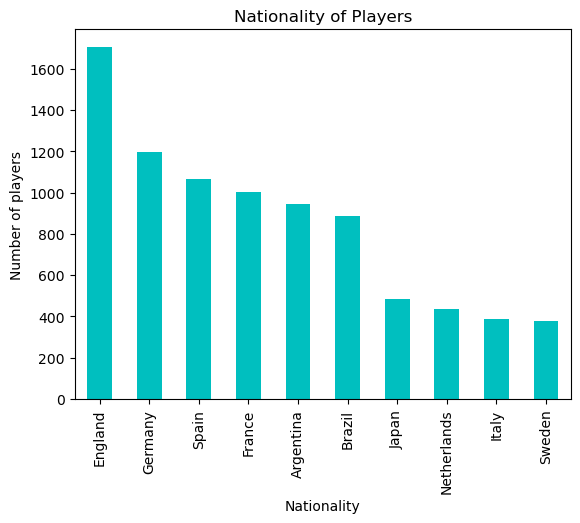

In [39]:
Number_of_players= Player_data.groupby(['Nationality']).size().sort_values(0,ascending=False)
Number_of_players.head(10)

Number_of_players.head(10).plot(kind='bar',color='c')
 
plt.xlabel("Nationality")
plt.ylabel("Number of players")
plt.title("Nationality of Players")
plt.show()

#### 2. Players Age range is from 53-23 years lets see age of all the players.**

/tmp/ipykernel_32/615021015.py:1: FutureWarning: In a future version of pandas all arguments of Series.sort_values will be keyword-only.
  Age_of_players= Player_data.groupby(['Age']).size().sort_values(0,ascending=False)


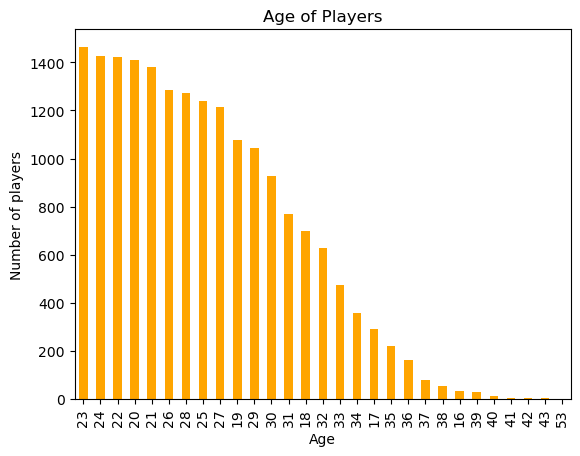

In [24]:

Age_of_players= Player_data.groupby(['Age']).size().sort_values(0,ascending=False)

Age_of_players.plot(kind='bar',color='orange')
plt.xlabel("Age")
plt.ylabel("Number of players")
plt.title("Age of Players")
plt.show()

#### 3. Number of Hits by top 10 Players with Highest Hits**

/tmp/ipykernel_32/1442171639.py:1: FutureWarning: In a future version of pandas all arguments of Series.sort_values will be keyword-only.
  Number_of_hits = Player_data.groupby(['Name']).size().sort_values(0,ascending=False)


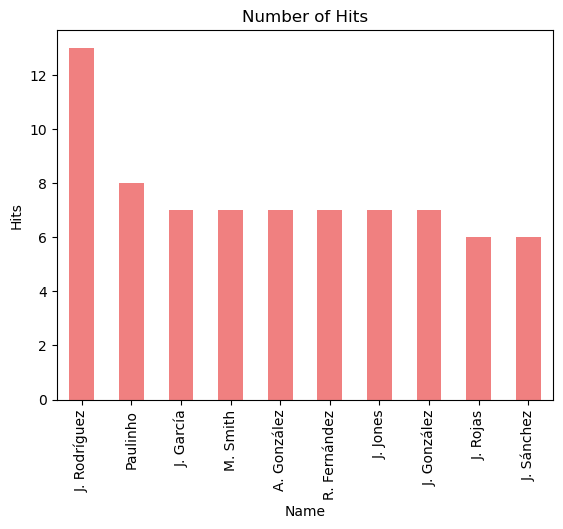

In [25]:
Number_of_hits = Player_data.groupby(['Name']).size().sort_values(0,ascending=False)

Number_of_hits.head(10).plot(kind='bar',color='lightcoral')
plt.xlabel("Name")
plt.ylabel("Hits")
plt.title("Number of Hits")
plt.show()

/tmp/ipykernel_32/3227406521.py:1: FutureWarning: In a future version of pandas all arguments of Series.sort_values will be keyword-only.
  Number_of_hits = Player_data.groupby(['Name']).size().sort_values(0,ascending=False)


Text(0.5, 0, 'Name')

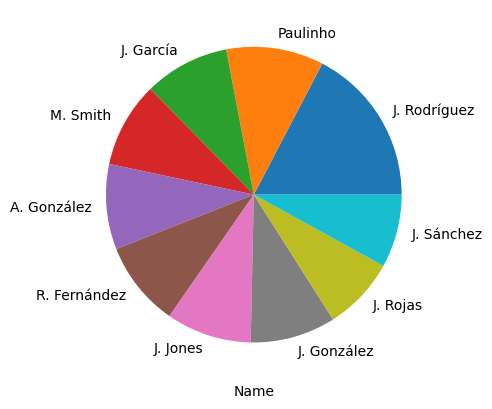

In [26]:
Number_of_hits = Player_data.groupby(['Name']).size().sort_values(0,ascending=False)
Number_of_hits.head(10).plot(kind='pie')
plt.xlabel("Name")

#### 4. Lets see for best players having highest OVA and Hits**

In [27]:
Best_players = Player_data.sort_values(['↓OVA', 'Hits'],ascending=[False, False]).head(10)

Top= Best_players[['Name', '↓OVA', 'Hits']]
Top_players=Top.head(10)
Top_players

,Name,↓OVA,Hits
0,L. Messi,93,372
1,Cristiano Ronaldo,92,344
2,J. Oblak,91,86
4,Neymar Jr,91,273
5,R. Lewandowski,91,182
3,K. De Bruyne,91,163
11,M. ter Stegen,90,93
7,Alisson,90,79
6,K. Mbappé,90,646
9,S. Mané,90,170


In [28]:
Top_players.dtypes

Name    object
↓OVA     int64
Hits    object
dtype: object

In [29]:
print(Top_players)

                 Name  ↓OVA Hits
0            L. Messi    93  372
1   Cristiano Ronaldo    92  344
2            J. Oblak    91   86
4           Neymar Jr    91  273
5      R. Lewandowski    91  182
3        K. De Bruyne    91  163
11      M. ter Stegen    90   93
7             Alisson    90   79
6           K. Mbappé    90  646
9             S. Mané    90  170


In [30]:
Top10_players = [['L. Messi', 93, 372], ['Cristiano Ronaldo', 92, 344], ['J. Oblak ', 91, 86],['Neymar Jr' ,91 , 273],['R. Lewandowski', 91 , 182],['K. De Bruyne',  91 ,163], ['M. ter Stegen' ,90 ,93] ,['Alisson', 90 , 79],['K.Mbappé', 90 , 646],['S. Mané ', 90 ,170]]
Top10_playersdf = pd.DataFrame(Top10_players, columns=["Name","OVA","Hits"])
print(Top10_playersdf)


                Name  OVA  Hits
0           L. Messi   93   372
1  Cristiano Ronaldo   92   344
2          J. Oblak    91    86
3          Neymar Jr   91   273
4     R. Lewandowski   91   182
5       K. De Bruyne   91   163
6      M. ter Stegen   90    93
7            Alisson   90    79
8           K.Mbappé   90   646
9           S. Mané    90   170


/tmp/ipykernel_32/3466641328.py:1: FutureWarning: In a future version of pandas all arguments of Series.sort_values will be keyword-only.
  top10df= Top10_playersdf.groupby(['Hits']).size().sort_values(0,ascending=False)


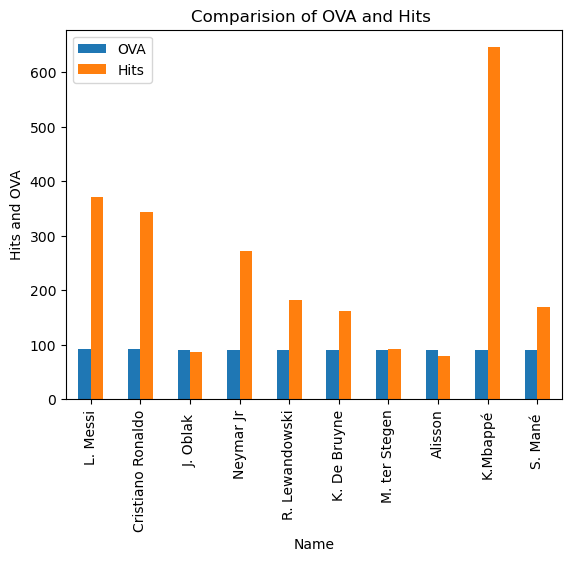

In [31]:

top10df= Top10_playersdf.groupby(['Hits']).size().sort_values(0,ascending=False)

Top10_playersdf.plot(x='Name',kind='bar')
plt.xlabel("Name")
plt.ylabel("Hits and OVA")
plt.title("Comparision of OVA and Hits ")
plt.show()



#### 5. Lets see how many teams participate in FIFA 2021**

In [42]:
Team_vals = Player_data['Team'].value_counts() 
Team_vals

                                 56
Spezia                           33
Chelsea                          33
Burnley                          33
West Ham United                  33
                                 ..
Clube Sport MarítimoJun 30, 2     1
Sheffield WednesdayJun 30, 2      1
Moreirense FCJun 30, 2            1
Leeds UnitedJun 30, 2             1
Macarthur FCAug 31, 2             1
Name: Team, Length: 1163, dtype: int64

In [43]:
print('  There are {} different Teams participated in FIFA 2021'.format(Team_vals.count()))


  There are 1163 different Teams participated in FIFA 2021


In [34]:
best_players = Player_data.sort_values('↓OVA',ascending = False).head(100)
best_players.head()

,photoUrl,LongName,playerUrl,Nationality,Positions,Name,Age,↓OVA,POT,Team & Contract,...,PAS,DRI,DEF,PHY,Hits,Day,Month,Year,Team,Contract
0,https://cdn.sofifa.com/players/158/023/21_60.png,Lionel Messi,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,RW ST CF,L. Messi,33,93,93,\n\n\n\nFC Barcelona\n2004 ~ 2021\n\n,...,91,95,38,65,372,07,01,2004,FC Barcelona,2004 ~ 2021
1,https://cdn.sofifa.com/players/020/801/21_60.png,C. Ronaldo dos Santos Aveiro,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,ST LW,Cristiano Ronaldo,35,92,92,\n\n\n\nJuventus\n2018 ~ 2022\n\n,...,81,89,35,77,344,07,10,2018,Juventus,2018 ~ 2022
2,https://cdn.sofifa.com/players/200/389/21_60.png,Jan Oblak,http://sofifa.com/player/200389/jan-oblak/210005/,Slovenia,GK,J. Oblak,27,91,93,\n\n\n\nAtlético Madrid\n2014 ~ 2023\n\n,...,78,90,52,90,86,07,16,2014,Atlético Madrid,2014 ~ 2023
3,https://cdn.sofifa.com/players/192/985/21_60.png,Kevin De Bruyne,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,CAM CM,K. De Bruyne,29,91,91,\n\n\n\nManchester City\n2015 ~ 2023\n\n,...,93,88,64,78,163,08,30,2015,Manchester City,2015 ~ 2023
4,https://cdn.sofifa.com/players/190/871/21_60.png,Neymar da Silva Santos Jr.,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,LW CAM,Neymar Jr,28,91,91,\n\n\n\nParis Saint-Germain\n2017 ~ 2022\n\n,...,86,94,36,59,273,08,03,2017,Paris Saint-Germain,2017 ~ 2022


#### 6. Lets find which teams has the best 100 FIFA players?**

In [45]:
Team_vals = best_players['Team'].value_counts()
Team_vals

Liverpool                   11
FC Barcelona                 9
Manchester City              9
Real Madrid                  9
Paris Saint-Germain          7
FC Bayern München            7
Juventus                     7
Chelsea                      5
Tottenham Hotspur            4
Inter                        4
Manchester United            4
Atlético Madrid              3
Napoli                       3
Lazio                        3
Borussia Dortmund            3
Leicester City               2
Arsenal                      2
Borussia Mönchengladbach     1
Real Sociedad                1
Atalanta                     1
Villarreal CF                1
Cagliari                     1
RB Leipzig                   1
Olympique Lyonnais           1
Milan                        1
Name: Team, dtype: int64

In [46]:
print('There are {} Teams in FIFA 2021 with best 100 FIFA Players'.format(Team_vals.count()))


There are 25 Teams in FIFA 2021 with best 100 FIFA Players


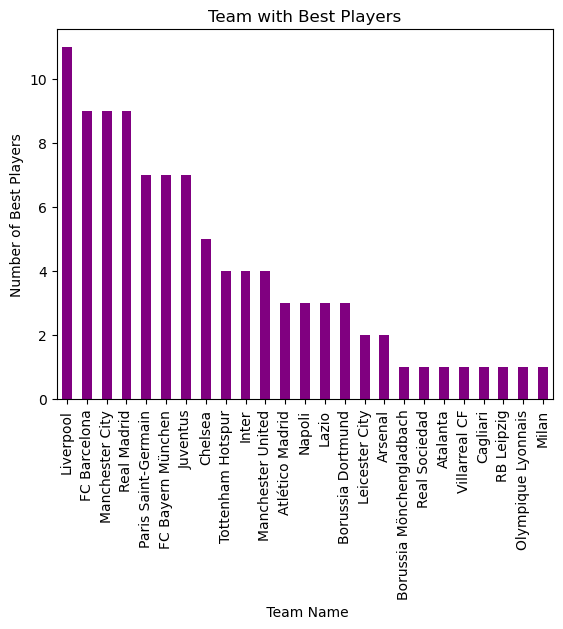

In [37]:

Team_vals.plot(kind="bar",color='purple');
plt.title("Team with Best Players");
plt.xlabel(" Team Name")
plt.ylabel("Number of Best Players")
plt.show()


# Conclusion
### After exploring, the insights we got from the data are as follows:


1. We got to know that most of the players are from 'England', 'Germany', 'Spain', 'France' and 'Argentina'.
2. Players Age range is from 53-23 most of the players age is 23.
3. Highest number of Hits is 13 by J. Rodríguez.
4. Best player based on OVA and Hits is  L. Messi  with 93 OVA and 372 Hits
5. There are 1163 different Teams participated in FIFA 2021
6. There are 25 Teams in FIFA 2021 with best 100 FIFA Players
7. Liverpool Team has 11 players which are among best 100 FIFA players, Liverpool team has highest best player count as compared to other countries.